In [1]:
import ast
import cv2
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
with open('../data/labels.txt', "r") as content:
    labels_map = ast.literal_eval(content.read())
    labels_map = {v: k for k, v in labels_map.items()}

In [3]:
labels_map

{0: 'Atelectasis',
 1: 'Cardiomegaly',
 2: 'Effusion',
 3: 'Infiltrate',
 4: 'Mass',
 5: 'Nodule',
 6: 'Pneumonia',
 7: 'Pneumothorax'}

In [4]:
predictions = pd.read_csv('../predictions.csv')
predictions.labels = predictions.labels.astype(object)
predictions.fillna('', inplace=True)
predictions['num_bboxes'] = predictions.predictions.apply(lambda x: len(x.split(";")) - 1)

In [5]:
predictions = predictions[predictions['num_bboxes'] > 0]

In [6]:
predictions.sample(10)

,image_id,predictions,labels,num_bboxes
87,00022837_015.png,0.9769 700 408 132 94; 0.6192 687 362 155 161;,"4,4",2
15,00022572_000.png,0.6450 499 439 456 424;,1,1
70,00022416_036.png,0.8212 101 175 258 543; 0.7901 364 430 540 360...,"2,1,3,6",4
37,00011985_006.png,0.8096 469 395 414 322;,1,1
97,00011022_004.png,0.8822 371 530 502 376;,1,1
5,00009953_021.png,0.7878 194 462 153 207;,4,1
34,00018663_007.png,0.9149 176 308 610 335;,1,1
69,00017528_004.png,0.9007 341 454 500 385;,1,1
9,00007038_000.png,0.6122 429 313 478 394;,1,1
26,00006304_016.png,0.6946 113 110 264 654; 0.5219 309 425 498 289;,"2,1",2


In [7]:
def plot_image_bboxes(image, bboxes, labels):
    box_color = (220, 0, 0)  
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    for box, label in zip(bboxes, labels):
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        x1, x2 = min(x1, x2), max(x1, x2)
        y1, y2 = min(y1, y2), max(y1, y2)        

        cv2.rectangle(image, (x1, y1), (x2, y2), box_color, 3)
        cv2.putText(image,
                    labels_map[label],
                    (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,  # font face
                    1.2,                       # font scale
                    box_color,                 # text color
                    thickness = 2)

    ax.set_axis_off()
    ax.imshow(image)

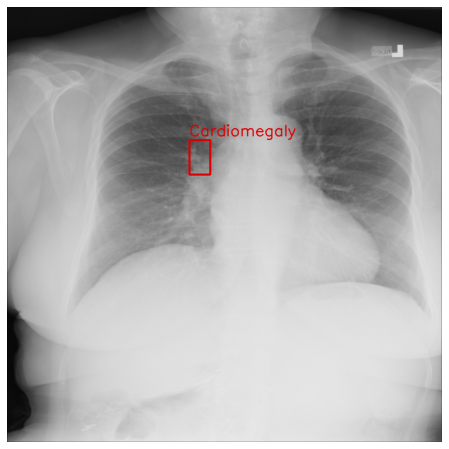

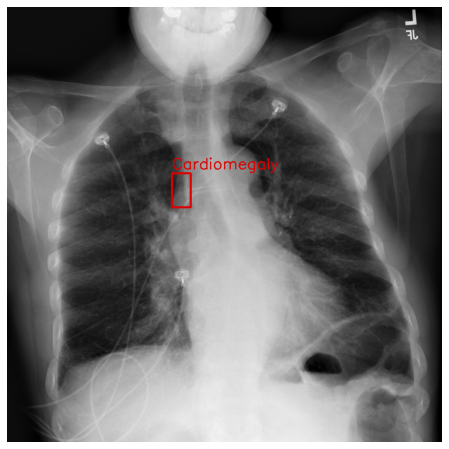

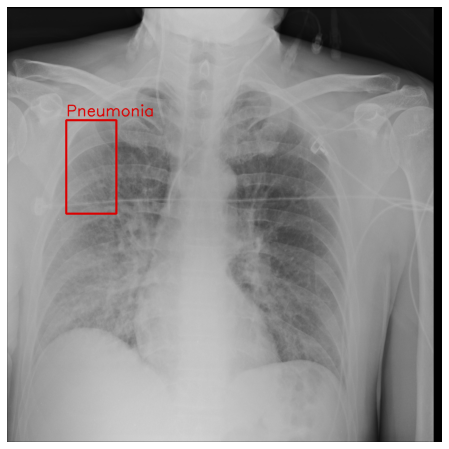

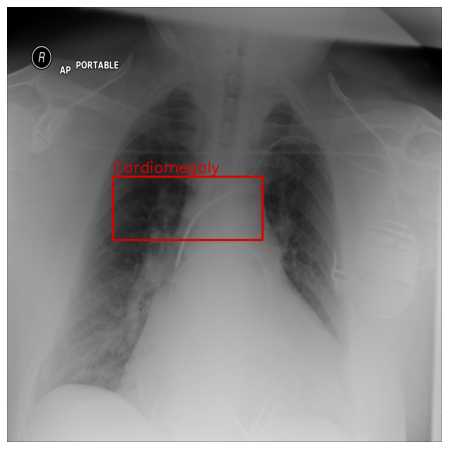

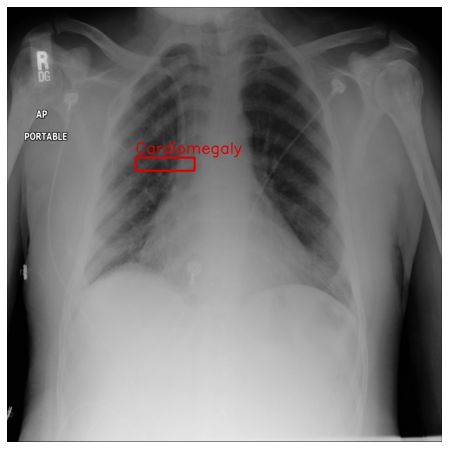

In [8]:
IMAGES_TO_SHOW = 5
random_state = 77

predictions_subset = predictions.sample(IMAGES_TO_SHOW, random_state=random_state)
for prediction in predictions_subset.itertuples():
    image_id = prediction.image_id
    bboxes_str = prediction.predictions
    labels_str = prediction.labels
    
    image = cv2.imread(f'../data/images/{image_id}', cv2.IMREAD_COLOR)
    
    bbox_list = bboxes_str.split(';')
    bbox_list = [bbox_str.split(' ') for bbox_str in bbox_list]
    bbox_list = [bbox_item for bbox_item in bbox_list if len(bbox_item) == 5]
    bbox_list = [(bbox_str[1], bbox_str[2], bbox_str[3], bbox_str[4])
                 for bbox_str in bbox_list]
    
    labels = [int(x) for x in labels_str.split(',')]

    plot_image_bboxes(image, bbox_list, labels)
    plt.show()